In [1]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import pandas as pd

In [2]:
def set_plt_params():
    plt.rcParams['lines.linewidth'] = 3
    plt.rcParams['lines.markersize'] = 12
    plt.rcParams['xtick.labelsize'] = 24
    plt.rcParams['ytick.labelsize'] = 24
    plt.rcParams['legend.fontsize'] = 40
    plt.rcParams['axes.titlesize'] = 36
    plt.rcParams['axes.labelsize'] = 24
    plt.rcParams['figure.figsize'] = (14.0, 8.0)
    plt.rcParams['font.size'] = 40

In [3]:
set_plt_params()

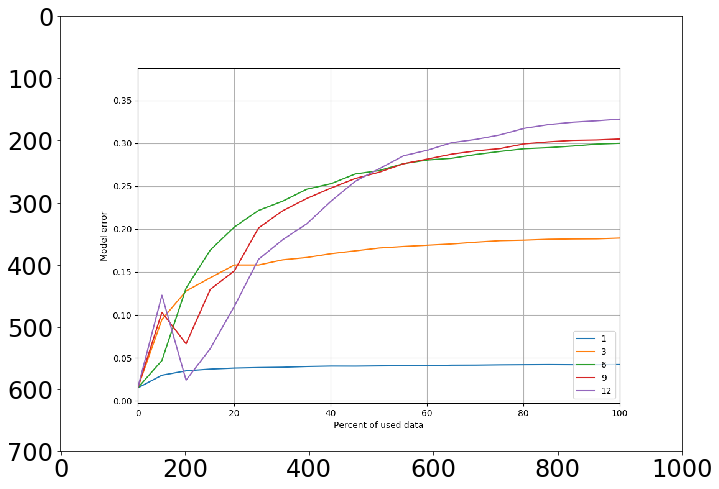

In [4]:
img = mpimg.imread('boston_noodles.png')
plt.imshow(img)

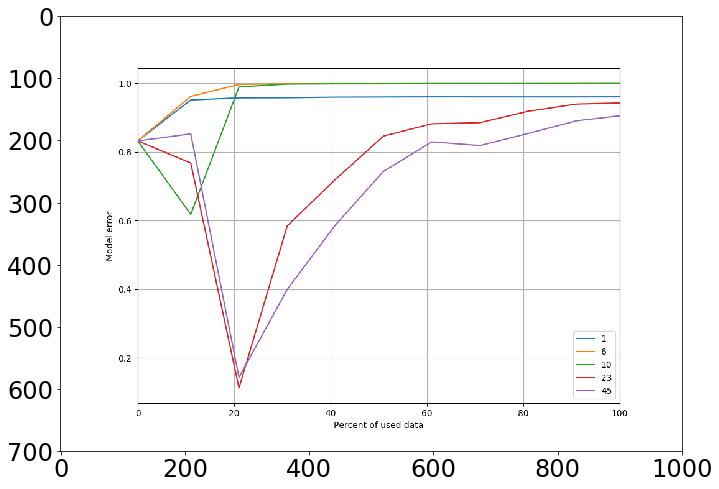

In [5]:
img = mpimg.imread('col_syn_noodles.png')
plt.imshow(img)

/Users/xtonev/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


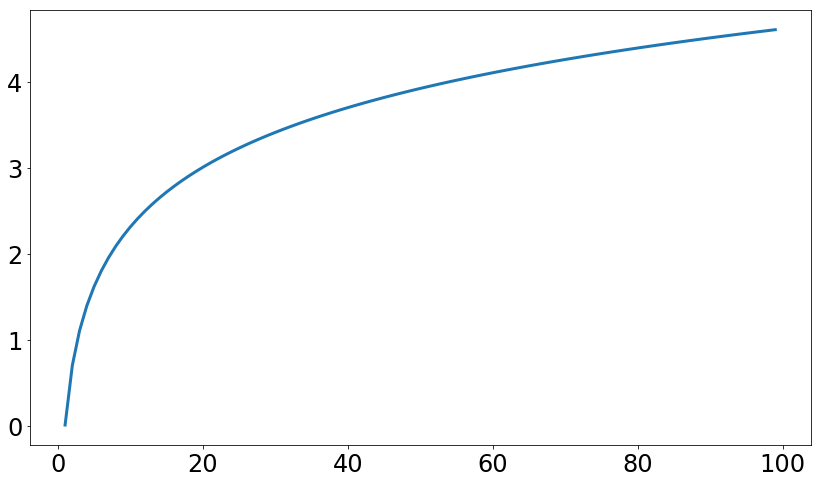

In [6]:
x = np.linspace(0, 100, 100)

plt.plot(np.log(x))

/Users/xtonev/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


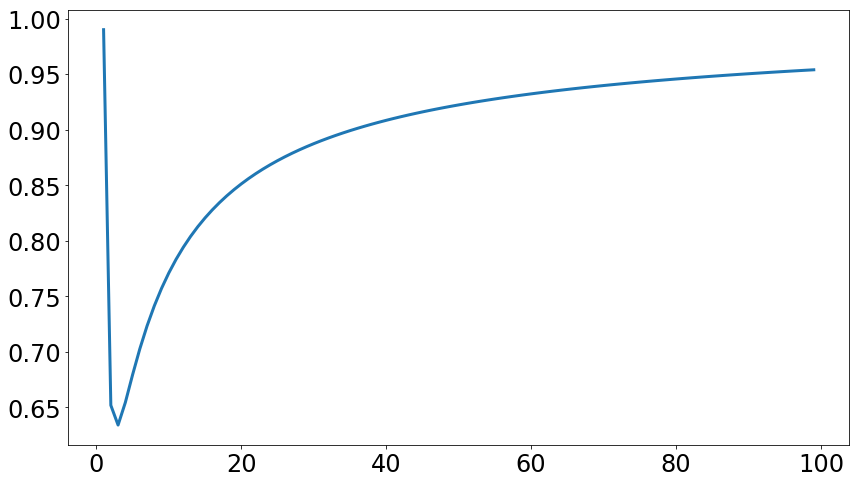

In [7]:
plt.plot(1 - np.log(x) / x)

# Optimize-minimize

In [8]:
from scipy.optimize import minimize

## Boston

In [9]:
boston_mean = pd.read_csv('boston_mean.csv', header=None).values

In [10]:
boston_mean_beautiful = boston_mean[:,6]
x_mean = np.array(range(2, len(boston_mean_beautiful) + 2))

#### Exp loss

In [11]:
def exp_loss(x, data):
    return sum((data - (x[3] + x[2] * np.exp(x[0] + x[1] * x_mean))) ** 2)

def exp_loss_der(x):
    return 

def exp_x(x):
    return x[3] + x[2] * np.exp(x[0] + x[1] * x_mean)

In [12]:
x0 = [0, 1, 2, 2]

In [13]:
res = minimize(exp_loss, x0, method='nelder-mead', 
               options={'xtol': 1e-8, 'disp': True}, 
               args=(boston_mean_beautiful))

Optimization terminated successfully.
         Current function value: 0.274483
         Iterations: 255
         Function evaluations: 515


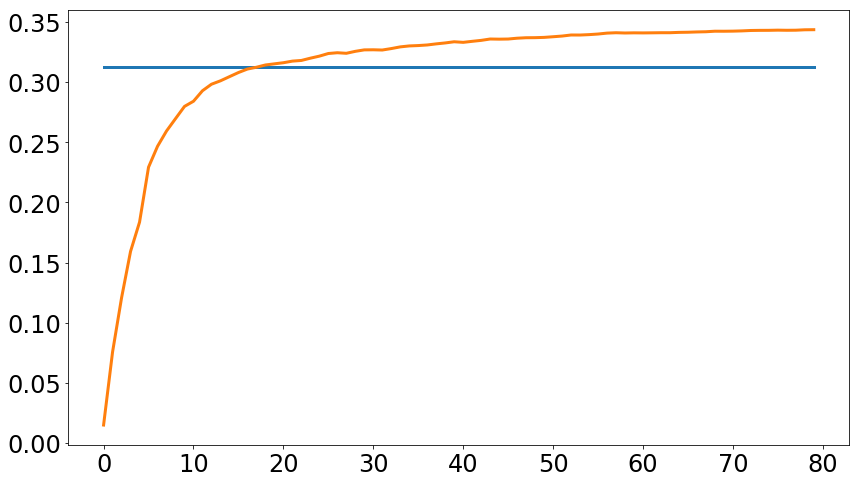

In [14]:
plt.plot(exp_x(res.x))
plt.plot(boston_mean_beautiful)

In [15]:
res = minimize(exp_loss, x0, method='nelder-mead', 
               options={'xtol': 1e-8, 'disp': True}, 
               args=(boston_mean[:,-1]))

Optimization terminated successfully.
         Current function value: 0.490085
         Iterations: 246
         Function evaluations: 517


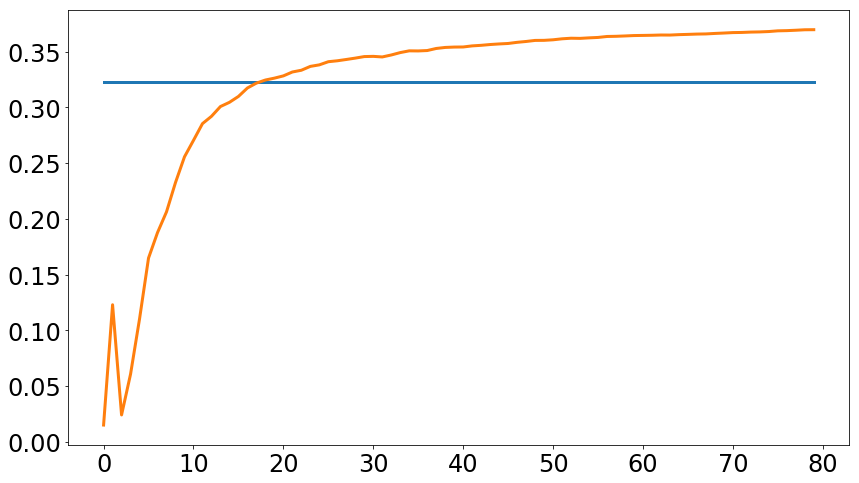

In [16]:
plt.plot(exp_x(res.x))
plt.plot(boston_mean[:,-1])

#### Exp log loss

In [17]:
def exp_log_loss(x, data):
    return sum(np.abs(data - (x[3] + x[2] * np.exp(x[0] + x[1] * np.log(x_mean)))))

def exp_loss_der(x):
    pass 

def exp_log_x(x):
    return x[3] + x[2] * np.exp(x[0] + x[1] * np.log(x_mean))

In [18]:
x0 = [-0.05, 1, 1, 1]

In [19]:
res = minimize(exp_log_loss, x0, method='nelder-mead', 
               options={'xtol': 1e-8, 'disp': True}, 
               args=(boston_mean_beautiful))

In [20]:
res.x

array([-0.05219276,  0.03463889,  0.79295182, -0.52573895])

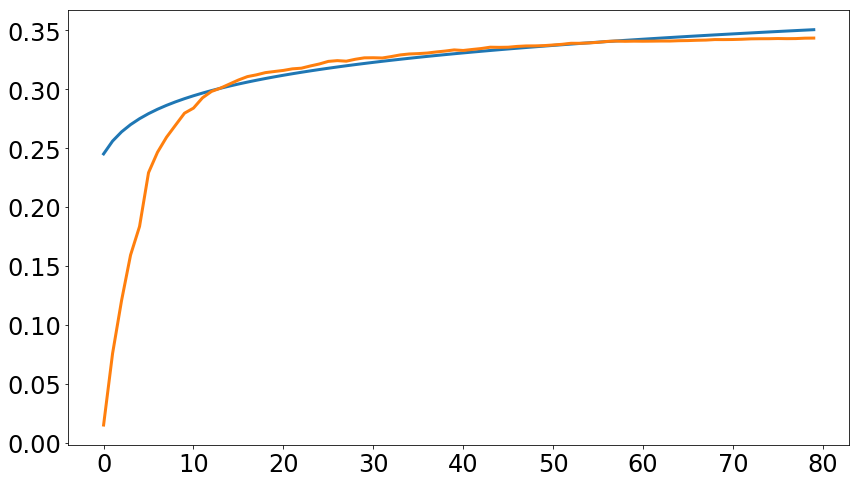

In [21]:
plt.plot(exp_log_x(res.x))
plt.plot(boston_mean_beautiful)

In [22]:
res = minimize(exp_log_loss, x0, method='nelder-mead', 
               options={'xtol': 1e-8, 'disp': True}, 
               args=(boston_mean[:,-1]))

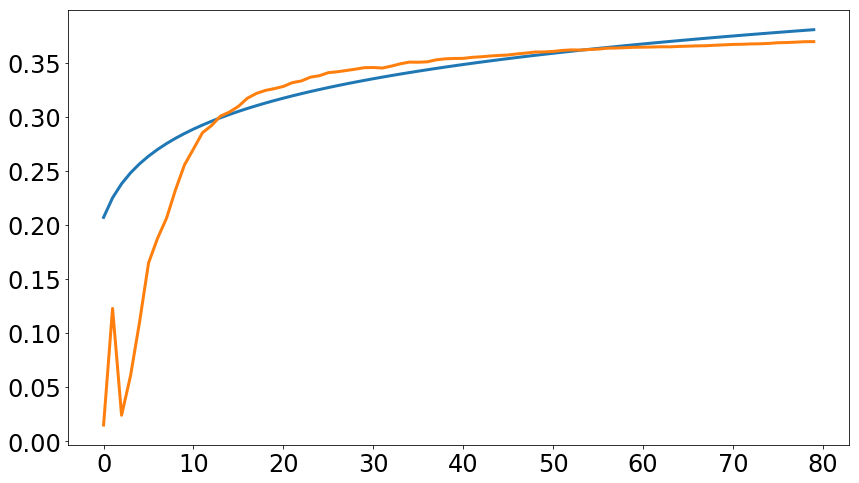

In [23]:
plt.plot(exp_log_x(res.x))
plt.plot(boston_mean[:,-1])

#### Log loss

In [24]:
def log_loss(x, data):
    return sum(np.abs(data - (x[0] + x[1] * np.log(x_mean))))

def exp_loss_der(x):
    pass 

def log_x(x):
    return x[0] + x[1] * np.log(x_mean)

In [25]:
x0 = [0, 1]

In [26]:
res = minimize(log_loss, x0, method='nelder-mead', 
               options={'xtol': 1e-8, 'disp': True}, 
               args=(boston_mean_beautiful))

Optimization terminated successfully.
         Current function value: 1.107514
         Iterations: 104
         Function evaluations: 197


In [27]:
res.x

array([0.21885423, 0.03006352])

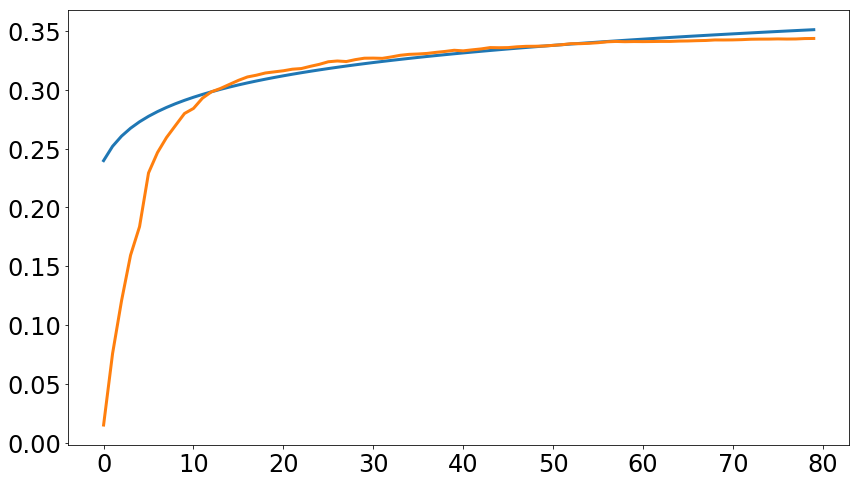

In [28]:
plt.plot(log_x(res.x))
plt.plot(boston_mean_beautiful)

In [29]:
res = minimize(log_loss, x0, method='nelder-mead', 
               options={'xtol': 1e-8, 'disp': True}, 
               args=(boston_mean[:,-1]))

Optimization terminated successfully.
         Current function value: 1.627224
         Iterations: 118
         Function evaluations: 228


In [30]:
res.x

array([0.15495641, 0.05188462])

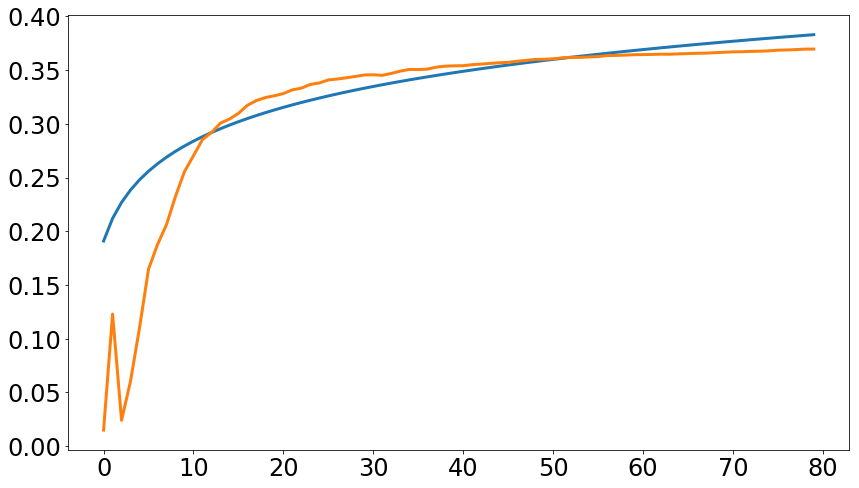

In [31]:
plt.plot(log_x(res.x))
plt.plot(boston_mean[:,-1])

#### Hyperbolae loss

In [32]:
def hyp_loss(x, data):
    return sum(np.abs(data - (x[0] + x[1] / x_mean)))

def exp_loss_der(x):
    pass 

def hyp_x(x):
    return x[0] + x[1] / x_mean

In [33]:
x0 = [0, 1]

In [34]:
res = minimize(hyp_loss, x0, method='nelder-mead', 
               options={'xtol': 1e-8, 'disp': True}, 
               args=(boston_mean_beautiful))

Optimization terminated successfully.
         Current function value: 0.226471
         Iterations: 112
         Function evaluations: 219


In [35]:
res.x

array([ 0.35394072, -0.83862252])

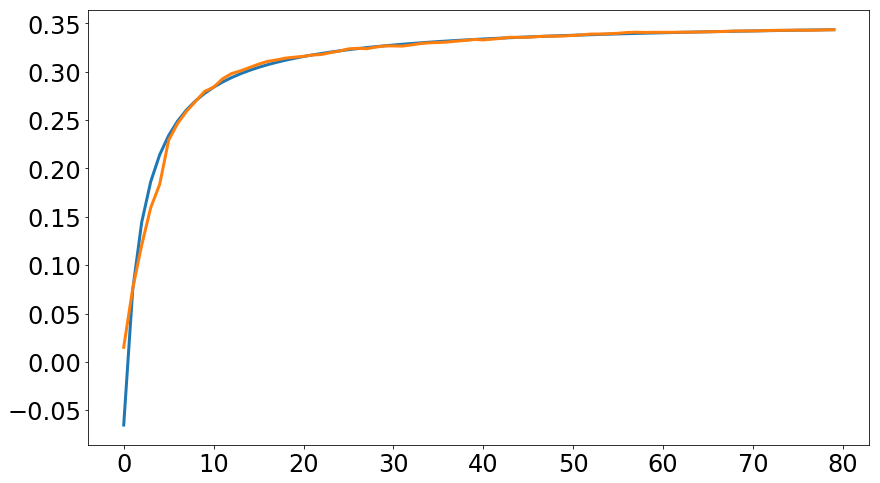

In [36]:
plt.plot(hyp_x(res.x))
plt.plot(boston_mean_beautiful)

In [37]:
res = minimize(hyp_loss, x0, method='nelder-mead', 
               options={'xtol': 1e-8, 'disp': True}, 
               args=(boston_mean[:,-1]))

Optimization terminated successfully.
         Current function value: 0.819332
         Iterations: 114
         Function evaluations: 223


In [38]:
res.x

array([ 0.38537304, -1.2949898 ])

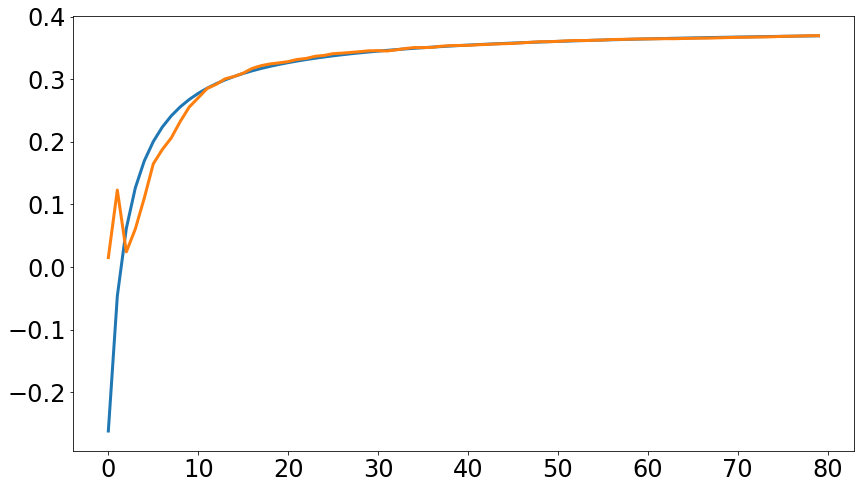

In [39]:
plt.plot(hyp_x(res.x))
plt.plot(boston_mean[:,-1])

### Fast stable e^-x

In [40]:
def stable_loss(x, data):
    return sum(np.abs(data - (x[0] + x[1] * np.exp(-x_mean))))

def exp_loss_der(x):
    pass 

def stable_x(x):
    return x[0] + x[1] * np.exp(-x_mean)

In [41]:
x0 = [0, 1]

In [42]:
res = minimize(stable_loss, x0, method='nelder-mead', 
               options={'xtol': 1e-8, 'disp': True}, 
               args=(boston_mean_beautiful))

In [43]:
res.x

array([ 0.33347466, -2.35301205])

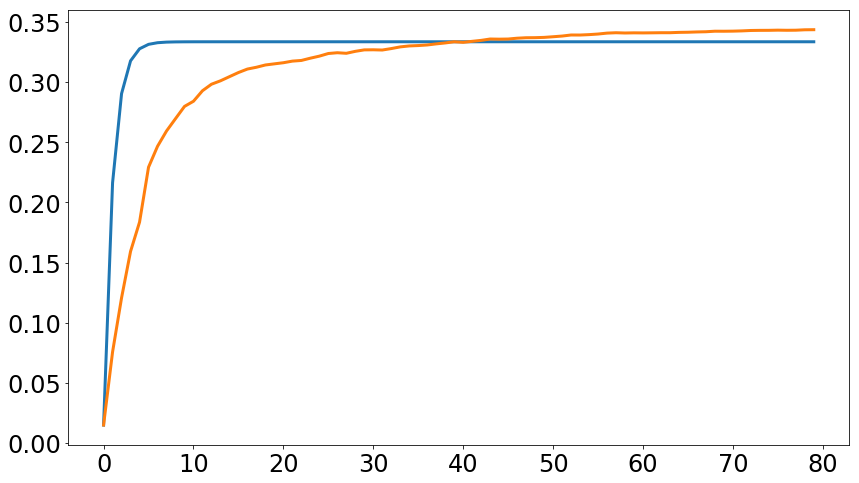

In [44]:
plt.plot(stable_x(res.x))
plt.plot(boston_mean_beautiful)

In [45]:
res = minimize(stable_loss, x0, method='nelder-mead', 
               options={'xtol': 1e-8, 'disp': True}, 
               args=(boston_mean[:,-1]))

Optimization terminated successfully.
         Current function value: 2.684190
         Iterations: 117
         Function evaluations: 227


In [46]:
res.x

array([ 0.35407591, -2.5052356 ])

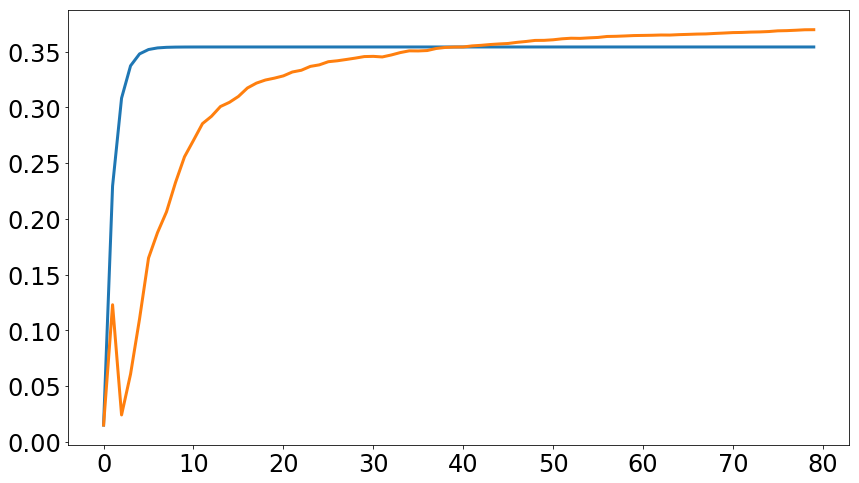

In [47]:
plt.plot(stable_x(res.x))
plt.plot(boston_mean[:,-1])

### Sigmoid

In [48]:
def sigmoid_loss(x, data):
    return sum(np.abs(data - (x[3] + x[2] / (x[0] + x[1] * np.exp(-x_mean)))))

def exp_loss_der(x):
    pass 

def sigmoid_x(x):
    return x[3] + x[2] / (x[0] + x[1] * np.exp(-x_mean))

In [49]:
x0 = [0, 1, 0, 1]

In [50]:
res = minimize(sigmoid_loss, x0, method='nelder-mead', 
               options={'xtol': 1e-8, 'disp': True}, 
               args=(boston_mean_beautiful))

Optimization terminated successfully.
         Current function value: 1.048070
         Iterations: 463
         Function evaluations: 788


In [51]:
res.x

array([1.44615637e-03, 1.04991620e+00, 3.86200428e-04, 6.85860335e-02])

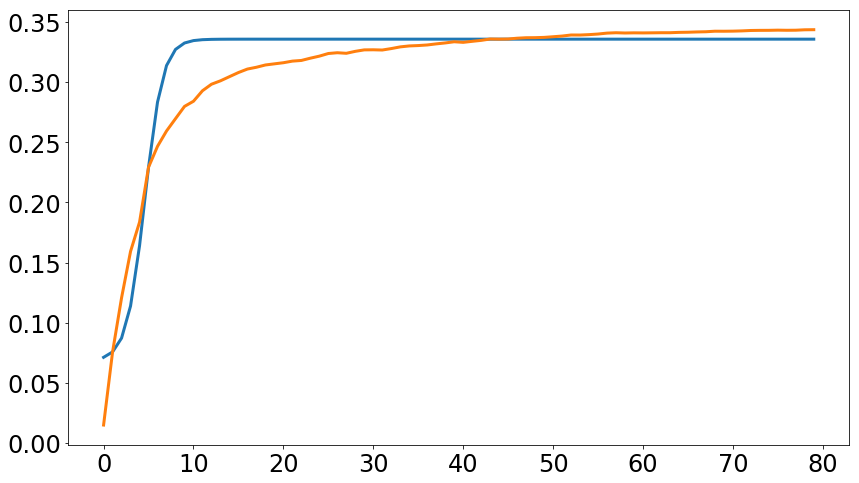

In [52]:
plt.plot(sigmoid_x(res.x))
plt.plot(boston_mean_beautiful)

In [53]:
res = minimize(sigmoid_loss, x0, method='nelder-mead', 
               options={'xtol': 1e-8, 'disp': True}, 
               args=(boston_mean[:,-1]))

In [54]:
res.x

array([2.97255726e-04, 1.09175023e+00, 9.10340659e-05, 4.93231427e-02])

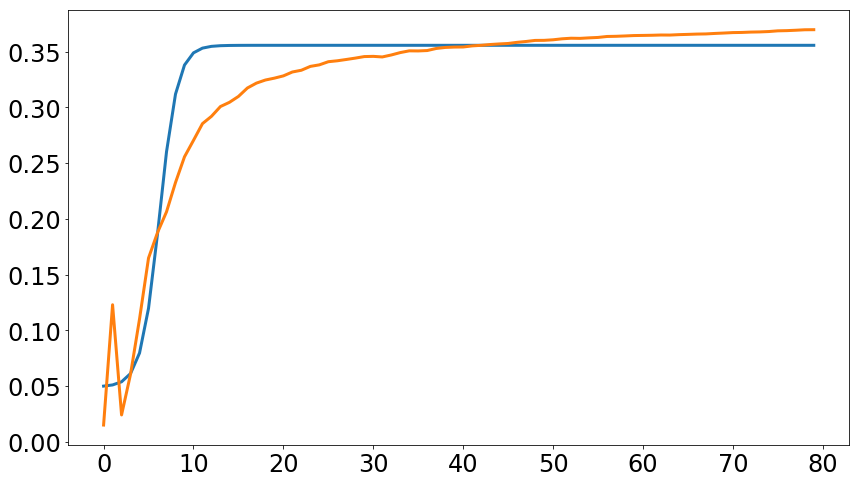

In [55]:
plt.plot(sigmoid_x(res.x))
plt.plot(boston_mean[:,-1])

## Ort synthetic

In [56]:
ort_syn_mean = pd.read_csv('ort_syn_mean.csv', header=None).values

In [57]:
ort_syn_mean.shape

(180, 24)

In [58]:
x_mean = np.array(range(2, ort_syn_mean.shape[0] + 2))

#### Exp loss

In [59]:
x0 = [0, 1, 2, 2]

In [60]:
res = minimize(exp_loss, x0, method='nelder-mead', 
               options={'xtol': 1e-8, 'disp': True}, 
               args=(ort_syn_mean[:,12]))

Optimization terminated successfully.
         Current function value: 0.048418
         Iterations: 251
         Function evaluations: 515


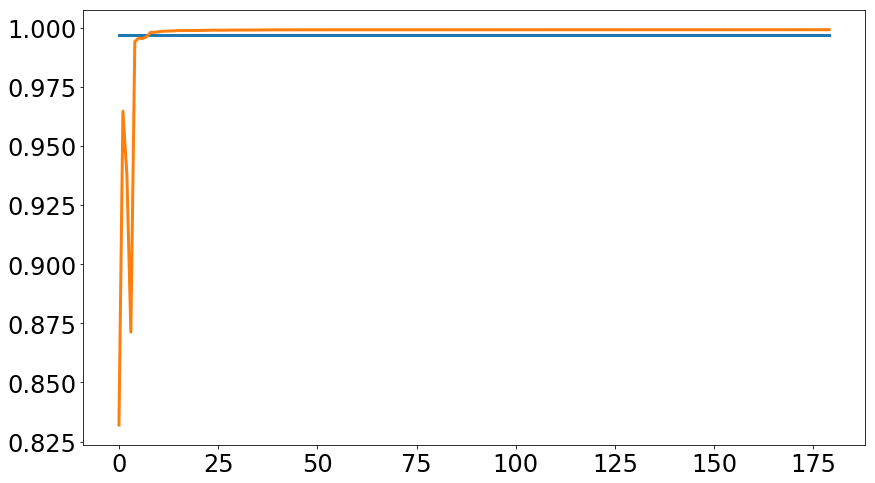

In [61]:
plt.plot(exp_x(res.x))
plt.plot(ort_syn_mean[:,12])

In [62]:
res = minimize(exp_loss, x0, method='nelder-mead', 
               options={'xtol': 1e-8, 'disp': True}, 
               args=(ort_syn_mean[:,-1]))

Optimization terminated successfully.
         Current function value: 2.082131
         Iterations: 262
         Function evaluations: 524


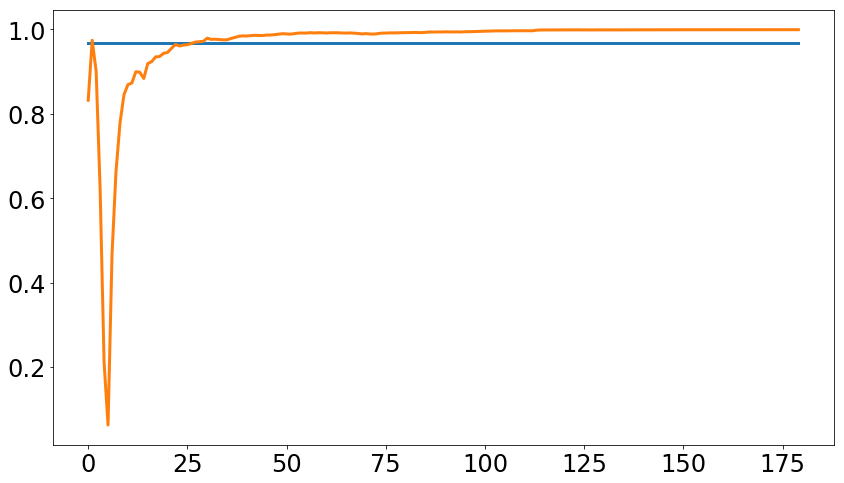

In [63]:
plt.plot(exp_x(res.x))
plt.plot(ort_syn_mean[:,-1])

#### Exp log loss

In [64]:
x0 = [-0.05, 1, 1, 1]

In [65]:
res = minimize(exp_log_loss, x0, method='nelder-mead', 
               options={'xtol': 1e-8, 'disp': True}, 
               args=(ort_syn_mean[:,12]))

Optimization terminated successfully.
         Current function value: 0.412112
         Iterations: 201
         Function evaluations: 372


In [66]:
res.x

array([-7.80482479e-02,  2.07265869e-04,  5.65887590e-01,  4.75332046e-01])

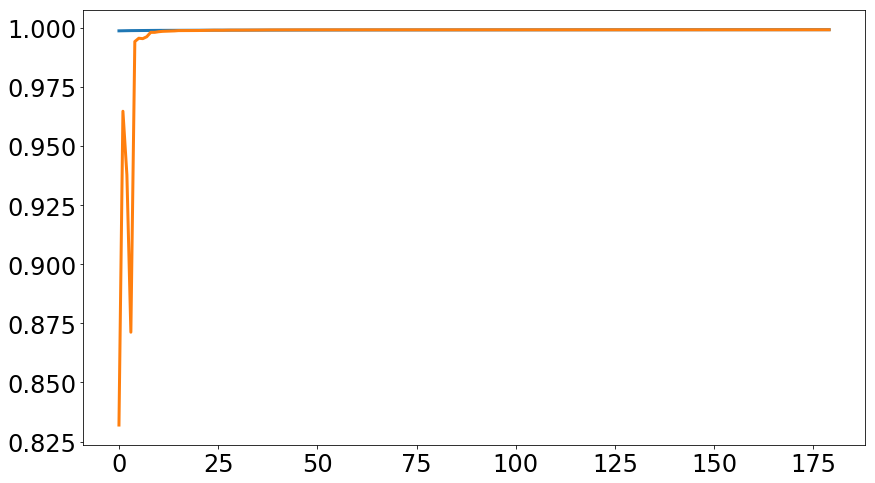

In [67]:
plt.plot(exp_log_x(res.x))
plt.plot(ort_syn_mean[:,12])

In [68]:
res = minimize(exp_log_loss, x0, method='nelder-mead', 
               options={'xtol': 1e-8, 'disp': True}, 
               args=(ort_syn_mean[:,-1]))

Optimization terminated successfully.
         Current function value: 4.211231
         Iterations: 184
         Function evaluations: 331


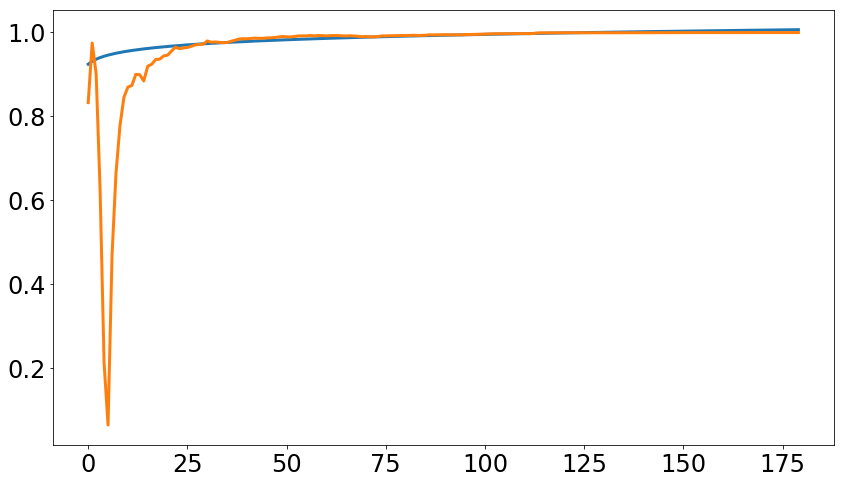

In [69]:
plt.plot(exp_log_x(res.x))
plt.plot(ort_syn_mean[:,-1])

#### Log loss

In [70]:
x0 = [0, 1]

In [71]:
res = minimize(log_loss, x0, method='nelder-mead', 
               options={'xtol': 1e-8, 'disp': True}, 
               args=(ort_syn_mean[:,12]))

Optimization terminated successfully.
         Current function value: 0.412111
         Iterations: 107
         Function evaluations: 206


In [72]:
res.x

array([9.98732477e-01, 1.08579930e-04])

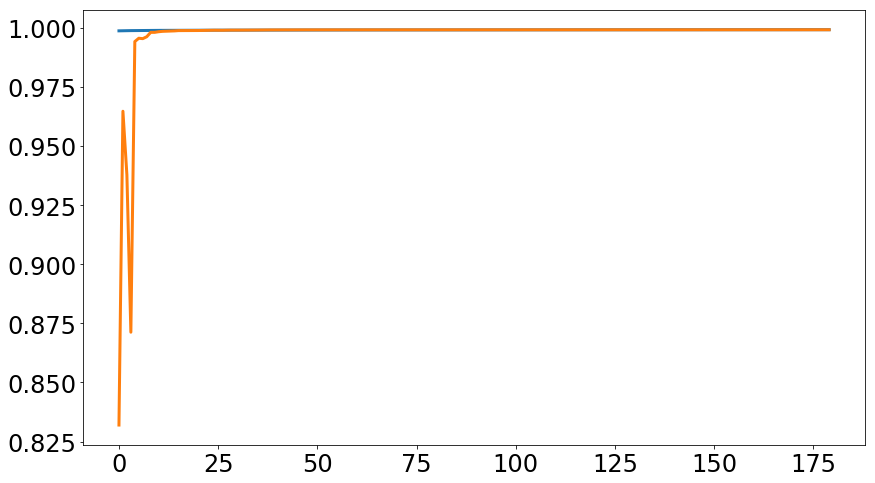

In [73]:
plt.plot(log_x(res.x))
plt.plot(ort_syn_mean[:,12])

In [74]:
res = minimize(log_loss, x0, method='nelder-mead', 
               options={'xtol': 1e-8, 'disp': True}, 
               args=(ort_syn_mean[:,-1]))

Optimization terminated successfully.
         Current function value: 4.179769
         Iterations: 104
         Function evaluations: 193


In [75]:
res.x

array([0.9051994 , 0.01938376])

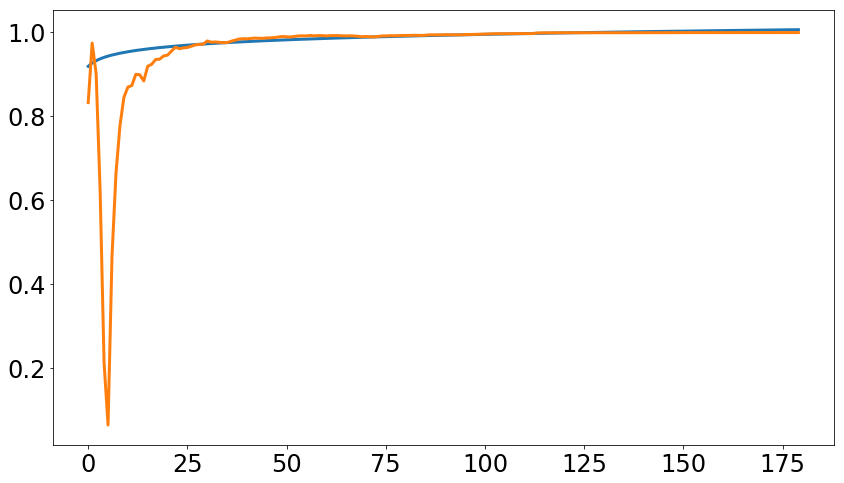

In [76]:
plt.plot(log_x(res.x))
plt.plot(ort_syn_mean[:,-1])

#### Hyperbolae loss

In [77]:
x0 = [0, 1]

In [78]:
res = minimize(hyp_loss, x0, method='nelder-mead', 
               options={'xtol': 1e-8, 'disp': True}, 
               args=(ort_syn_mean[:,12]))

Optimization terminated successfully.
         Current function value: 0.392639
         Iterations: 123
         Function evaluations: 236


In [79]:
res.x

array([ 0.99951852, -0.02691666])

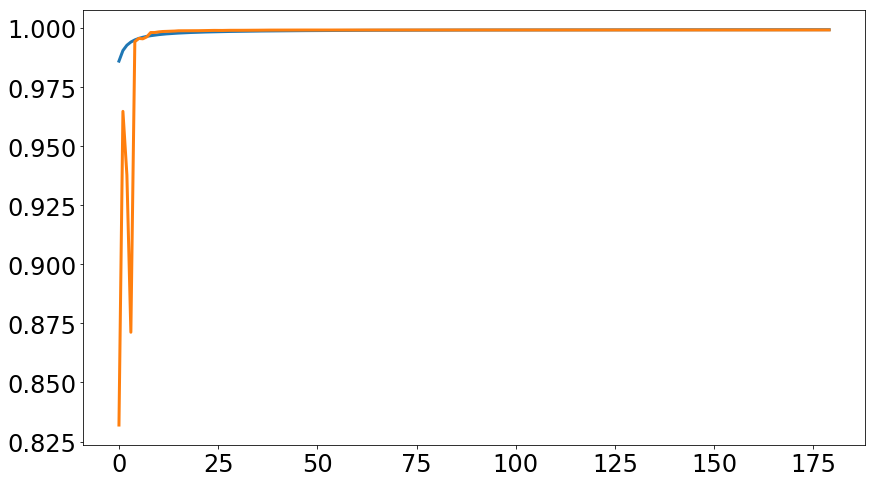

In [80]:
plt.plot(hyp_x(res.x))
plt.plot(ort_syn_mean[:,12])

In [81]:
res = minimize(hyp_loss, x0, method='nelder-mead', 
               options={'xtol': 1e-8, 'disp': True}, 
               args=(ort_syn_mean[:,-1]))

Optimization terminated successfully.
         Current function value: 3.766684
         Iterations: 131
         Function evaluations: 252


In [82]:
res.x

array([ 1.00673663, -1.14050885])

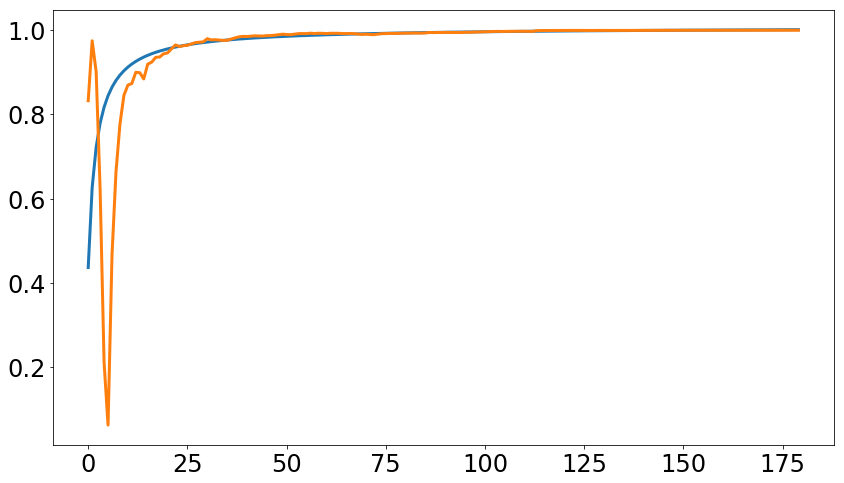

In [83]:
plt.plot(hyp_x(res.x))
plt.plot(ort_syn_mean[:,-1])

### Fast stable e^-x

In [84]:
x0 = [0, 1]

In [85]:
res = minimize(stable_loss, x0, method='nelder-mead', 
               options={'xtol': 1e-8, 'disp': True}, 
               args=(ort_syn_mean[:,12]))

Optimization terminated successfully.
         Current function value: 0.207379
         Iterations: 126
         Function evaluations: 240


In [86]:
res.x

array([ 0.99924194, -1.23588458])

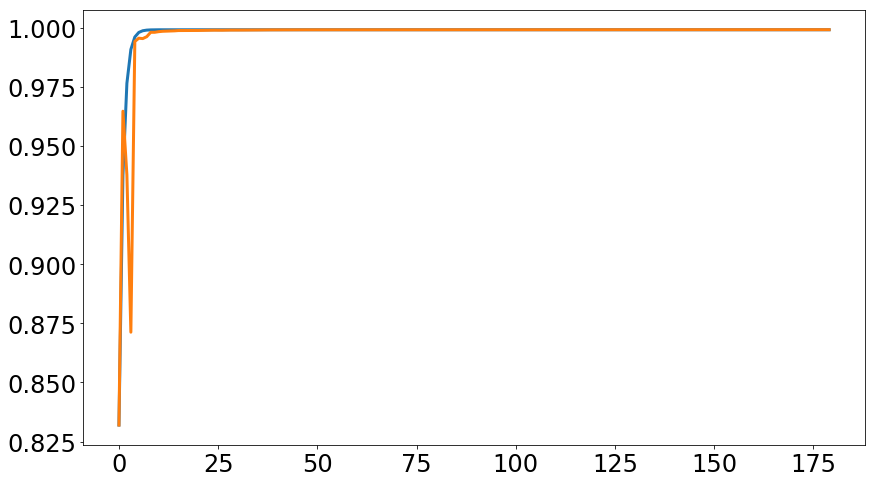

In [87]:
plt.plot(stable_x(res.x))
plt.plot(ort_syn_mean[:,12])

In [88]:
res = minimize(stable_loss, x0, method='nelder-mead', 
               options={'xtol': 1e-8, 'disp': True}, 
               args=(ort_syn_mean[:,-1]))

Optimization terminated successfully.
         Current function value: 5.275522
         Iterations: 113
         Function evaluations: 209


In [89]:
res.x

array([ 0.99384305, -1.19599193])

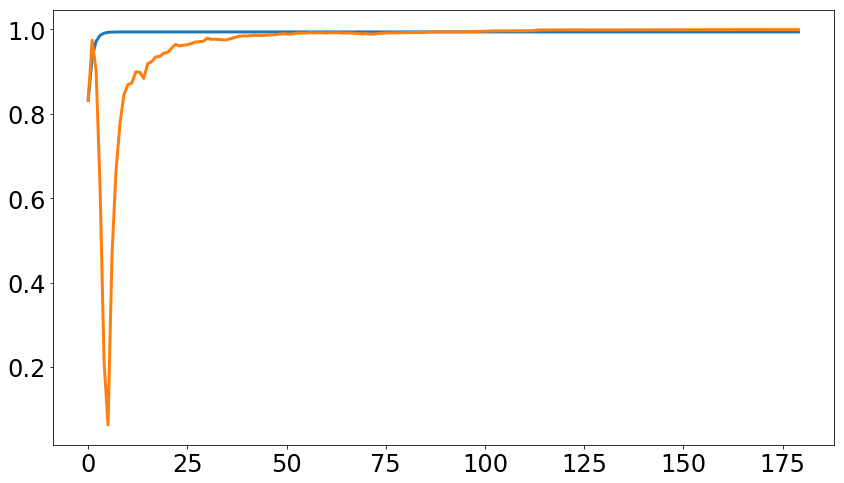

In [90]:
plt.plot(stable_x(res.x))
plt.plot(ort_syn_mean[:,-1])

### Sigmoid

In [91]:
x0 = [0, 1, 0, 1]

In [92]:
res = minimize(sigmoid_loss, x0, method='nelder-mead', 
               options={'xtol': 1e-8, 'disp': True}, 
               args=(ort_syn_mean[:,12]))

Optimization terminated successfully.
         Current function value: 0.309482
         Iterations: 389
         Function evaluations: 670


In [93]:
res.x

array([4.10452423e-04, 1.69651940e-01, 1.25944015e-05, 9.68558064e-01])

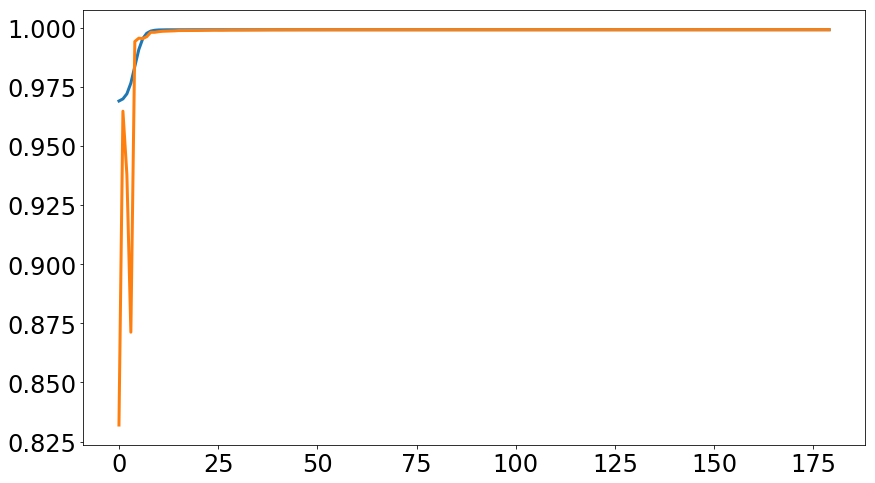

In [94]:
plt.plot(sigmoid_x(res.x))
plt.plot(ort_syn_mean[:,12])

In [95]:
res = minimize(sigmoid_loss, x0, method='nelder-mead', 
               options={'xtol': 1e-8, 'disp': True}, 
               args=(ort_syn_mean[:,-1]))

In [96]:
res.x

array([1.53270319e-04, 3.06944165e+00, 6.65594294e-05, 5.59581317e-01])

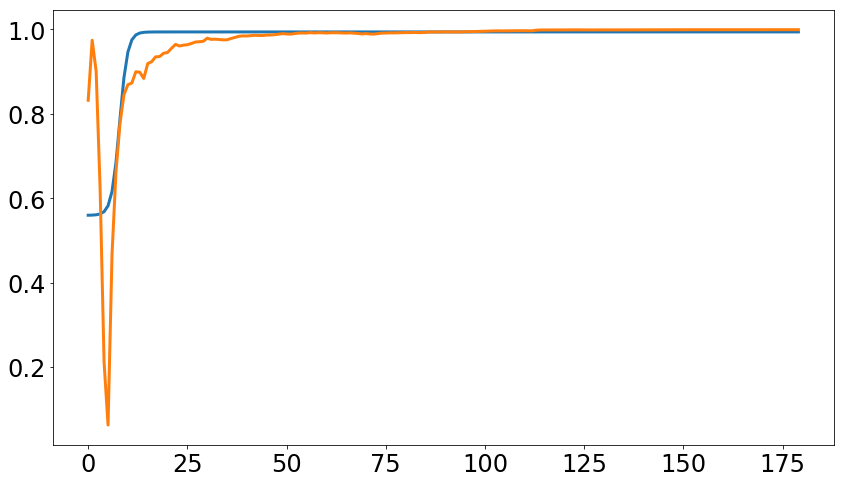

In [97]:
plt.plot(sigmoid_x(res.x))
plt.plot(ort_syn_mean[:,-1])